# 05_potential_flow
Cosmograph-style potential flow from Gaussian sources.

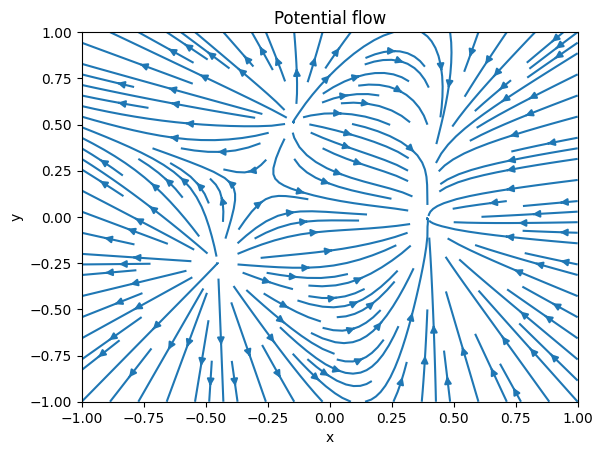

rel_curl 2.6368861691539128e-15
PASS


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 128
x = np.linspace(-1.0, 1.0, N, dtype=np.float64)
y = np.linspace(-1.0, 1.0, N, dtype=np.float64)
X, Y = np.meshgrid(x, y, indexing="xy")

centers = np.array([[-0.45, -0.25],
                    [ 0.40, -0.10],
                    [-0.10,  0.50],
                    [ 0.35,  0.35]], dtype=np.float64)
amps = np.array([ 1.0, -0.8, 0.7, -0.6 ], dtype=np.float64)
s2 = 0.06

phi = np.zeros((N, N), dtype=np.float64)
for (cx, cy), a in zip(centers, amps):
    phi += a*np.exp(-((X-cx)**2 + (Y-cy)**2)/(2.0*s2))

dx = 2.0/(N-1)
dy = 2.0/(N-1)
dphidy, dphidx = np.gradient(phi, dy, dx, edge_order=2)
vx = -dphidx
vy = -dphidy

dvy_dx = np.gradient(vy, dx, axis=1, edge_order=2)
dvx_dy = np.gradient(vx, dy, axis=0, edge_order=2)
curl = dvy_dx - dvx_dy
curl_rms = float(np.sqrt(np.mean(curl**2)))
grad_rms = float(np.sqrt(np.mean(vx**2 + vy**2)))
rel_curl = float(curl_rms/(grad_rms + 1e-12))

plt.figure()
plt.streamplot(x, y, vx, vy, density=1.2)
plt.title("Potential flow")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("rel_curl", rel_curl)
assert np.isfinite(vx).all() and np.isfinite(vy).all()
assert vx.shape == vy.shape == phi.shape
assert rel_curl < 5e-2
print("PASS")